In [162]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [163]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_0MqHva92TWI.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@ps-qw1up,"Yes, so?",2024-10-29T10:29:34Z,0,0
1,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@RipRoarin,People these days are so stupid they think the...,2024-10-21T20:00:34Z,0,0
2,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@valandil7454,If you accept that there're other people that ...,2024-09-26T15:02:01Z,0,0
3,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@JDoe-gf5oz,"About that Middlemas letter at 1:07, apparentl...",2024-09-17T21:36:17Z,0,0
4,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@jonathanpalma713,I'm OUTRAGED!!! NOT ONE HISPANIC IN THE WHOLE ...,2024-09-04T01:34:31Z,0,0
...,...,...,...,...,...,...,...,...
2807,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@sebastianmuller7013,my head hurts its a game so oh no blakc people...,2018-02-13T09:48:16Z,0,0
2808,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@jebbaz,"No typo, provably is in fact a word",2018-02-13T09:47:06Z,0,4
2809,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@heaveyrockyererer,Little to no black people in 1403 kingdom of B...,2018-02-13T09:46:33Z,2,13
2810,https://www.youtube.com/watch?v=0MqHva92TWI,Is Kingdom Come Deliverance Racist?,2018-02-13T09:38:29Z,@R0ndras,Medieval game showing our history as racists? ...,2018-02-13T09:42:41Z,9,41


In [164]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['harry', 'potter', 'hogwarts','legacy',
    'like', 'take', 'studio', 'got', 'people', 'get', 
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])

new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
     'like', 'take', 'studio', 'got', 'people', 'get',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','video',"would","first","game","last","woke"
    'fuck','fucking','kingdom','game',"good" ,"hope", "anything", "better", "accurate", "wtf", "lol", 
    "buy","make","get","even","never","always","people","daniel","thing","every","anything",
    "way","well","really","just"
])
lmtzr = WordNetLemmatizer()

In [165]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams

In [166]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
680,2018-02-20,Medieval Europe was about as hegemonic as a pl...,medieval europe hegemonic place nonwhite popul...
681,2018-02-20,its an historical game...,historical game
682,2018-02-20,Historicl accuracy > shitty sjw bullshit,historicl accuracy shitty sjw bullshit
683,2018-02-20,lol i wanna buy like 3 copies because fuck all...,lol wan buy copy fuck snowflake sick forced sh...
684,2018-02-20,Well I guess I won't buy this game's sense it...,guess buy game sense meant black ppl history u...
...,...,...,...
2807,2018-02-13,my head hurts its a game so oh no blakc people...,head hurt game blakc sjws sould cry game game
2808,2018-02-13,"No typo, provably is in fact a word",typo provably fact word
2809,2018-02-13,Little to no black people in 1403 kingdom of B...,little black 1403 kingdom bohemia mainland eur...
2810,2018-02-13,Medieval game showing our history as racists? ...,medieval game showing history racist waaaaay c...


In [167]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

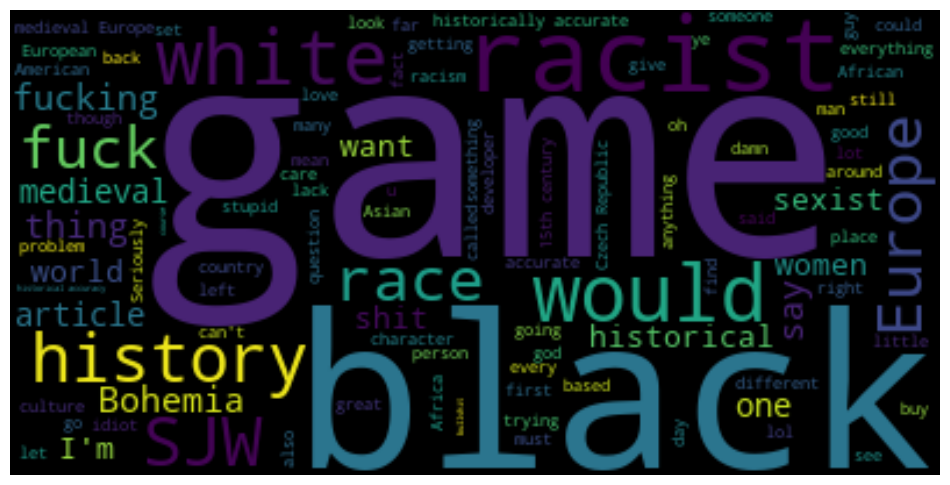

In [168]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [169]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df



The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2018-02-16,Haha those fucken stupid social justice retards.,haha fucken stupid social justice retard,negative
1,2018-02-19,No,,neutral
2,2018-02-19,shouldn't we be pretending that africans playe...,shouldnt pretending african played central rol...,negative
3,2018-02-18,Well excuseeee me this is medival era. This SH...,excuseeee medival era racist,negative
4,2018-02-13,oh my god are historically accurate games stil...,god historically accurate game still getting b...,negative
...,...,...,...,...
495,2018-02-18,Wha?? I can't...,wha,neutral
496,2018-02-15,I saw a girl give the game a 2/10 just because...,saw girl give game 210 female lead,neutral
497,2018-02-15,All I have to say is look at how little black ...,say look little black czech republic modern da...,positive
498,2018-02-17,"you should read what they, metro, said about M...",read metro said andromeda,neutral


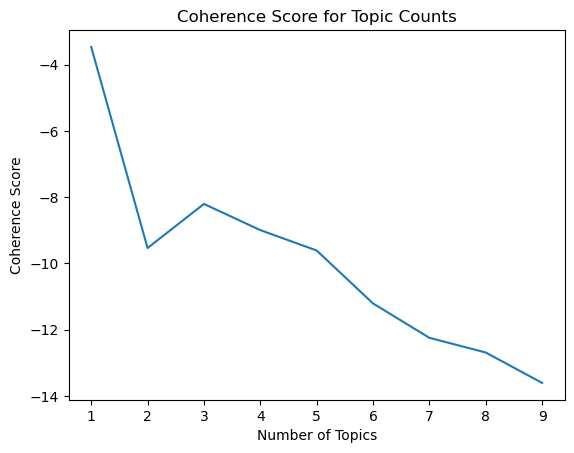

In [170]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [171]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 1
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.004*"racist" + 0.004*"black" + 0.003*"white" + 0.002*"europe" + 0.002*"medieval" + 0.002*"history" + 0.002*"fuck" + 0.002*"historically" + 0.002*"historical" + 0.002*"say"')]


1 topic has the highest coherence score,and after one there is a very steep slope down, meaning that adding more topics lower significantly the coherence score.
we also have one major topic in the biagrams, so 1 is fine.

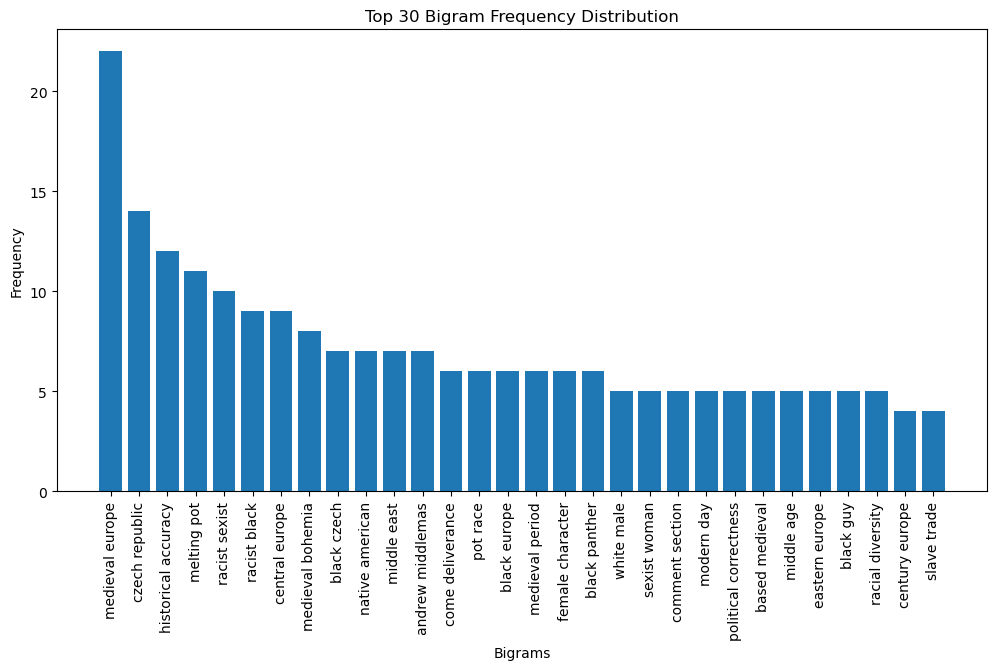

In [173]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [174]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
#df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_bad_topics.to_csv(file_path, index=False)
#df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
